<class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.9961770327892957
0.8403528114663726


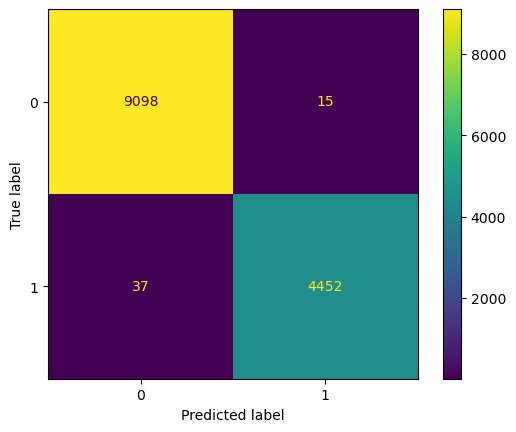

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.9961770327892957
0.891510474090408


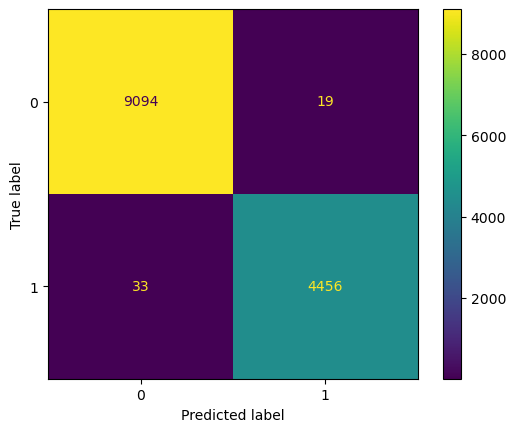

<class 'sklearn.naive_bayes.GaussianNB'>
0.4485369798559035
0.4432194046306505


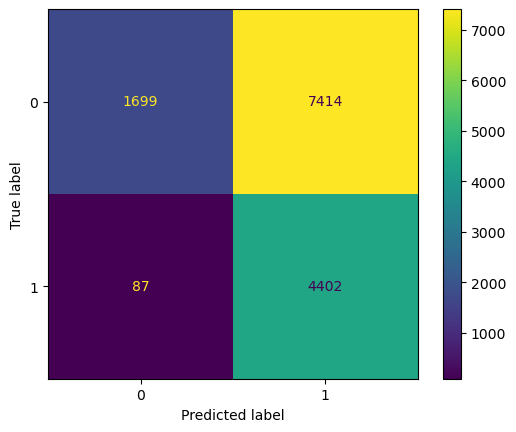

<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
0.7886340244081753
0.7982359426681367


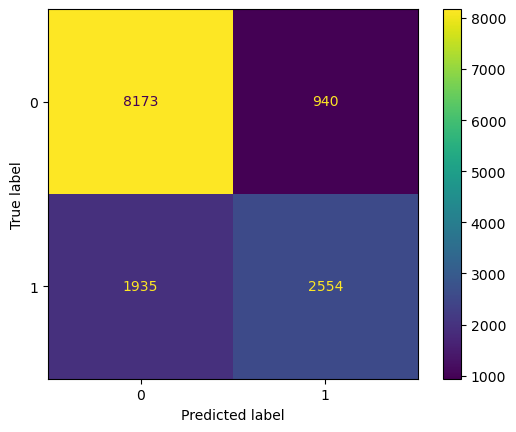

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
0.8526687251874724
0.7969128996692393


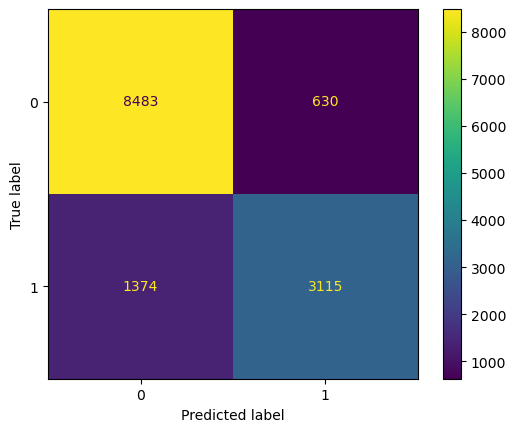

In [4]:
# RICERCA MODELLO MIGLIORE

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Caricamento dei dati di train e test
train_data = pd.read_csv("train__dataset.csv")
test_data = pd.read_csv("test__dataset.csv")

# Divido i dati di train tra features e output
x = train_df.iloc[: , :len(train_df.columns)-1]
y = train_df["booking_status"]


x_train, x_test, y_train, y_test = train_test_split(x, y)

# Creo i modelli
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = GaussianNB()
model4 = LinearDiscriminantAnalysis()
model5 = KNeighborsClassifier()

models = [model1,model2,model3,model4,model5]


# Trovo il modello più accurato
for model in models:
    # Alleno il modello
    model.fit(x_train, y_train)
    # Uso il modello per predire i valori
    predicted_test = model.predict(x_test)
    predicted_train = model.predict(x_train)
    # Accuratezza del modello creato
    
    print(type(model))
    print(accuracy_score(y_train, predicted_train))
    print(accuracy_score(y_test, predicted_test))


    cm = confusion_matrix(y_train, predicted_train)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

    plt.show()


In [2]:
# ESEMPIO di utilizzo del modello migliore trovato per classificare i dati di test
# Ricreo il modello da 0 così da allenarlo con TUTTI i dati di train

# Estraggo i dataframe dai csv
train_df = pd.read_csv("train__dataset.csv")
test_df = pd.read_csv("test__dataset.csv")

# Divido i dati di train tra features e output
x_train = train_df.iloc[: , :len(train_df.columns)-1]
y_train = train_df["booking_status"]


# Creo il modello
model = RandomForestClassifier()

# Alleno il modello direttamente con tutti i dati di train
model.fit(x_train, y_train)


# Uso il modello per predire i valori del dataframe di test
predicted = model.predict(test_df)

confirmed = sum(predicted)/len(predicted) *100
canceled = (len(predicted)-sum(predicted))/len(predicted) *100
print("Percentuale di utenti che hanno CONFERMATO la prenotazione: ",canceled)
print("Percentuale di utenti che hanno ANNULLATO la prenotazione: ",confirmed)





Percentuale di utenti che hanno CONFERMATO la prenotazione:  70.37710883228581
Percentuale di utenti che hanno ANNULLATO la prenotazione:  29.622891167714194
